## Import Necessary Modules

In [2]:
import tensorflow as tf  # import deep learning libraries
from tensorflow import keras
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import numpy as np

### Load the Dataset

In [3]:
X = np.load("data/X.npy") 
y = np.load("data/Y.npy")

In [4]:
print(X.shape) # 64 * 64 pixel with 1 (greyscale)
print(y.shape)

(2062, 64, 64)
(2062, 10)


Let's take a look at some of the examples

Distribution of Hand-Sign Numbers by Image index
___
1855 - 2061: 5

1649 - 1854: 2

1443 - 1648: 3 

1236 - 1442: 4

1028 - 1235: 8

822 - 1027: 1

615 - 821: 6

409 - 614: 7

204 - 408: 0

0 - 203: 9

Display Image

(-0.5, 63.5, 63.5, -0.5)

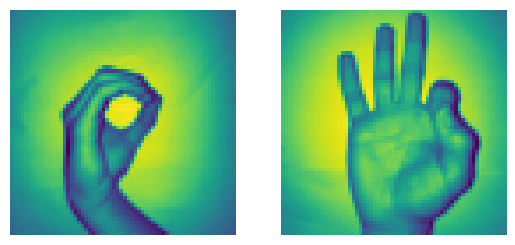

In [5]:
plt.subplot(1,2,1)
plt.imshow(X[209])
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(X[9])
plt.axis("off")

### Data Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=87, test_size=0.2)

In [7]:
X_train.shape, X_test.shape

((1649, 64, 64), (413, 64, 64))

### Data Preprocessing

In [8]:
# flatten the data to a single 4096 array
X_train = X_train.reshape(len(X_train), 64 * 64)
X_test = X_test.reshape(len(X_test), 64 * 64)

In [9]:
# converting from one hot encoded values to single digits
y_train = np.array([value.argmax() for value in y_train])
y_test = np.array([value.argmax() for value in y_test])

No normalization will be performed as data seems to be normalized already

### ANN

In [10]:
model = keras.Sequential([
    layers.Dense(10, input_shape=(4096,), activation = "softmax")
])
model.compile(
optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### Training the Model

In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 1s 3ms/step - loss: 2.5141 - accuracy: 0.1698
Epoch 2/10
52/52 [==============================] - 0s 3ms/step - loss: 2.0201 - accuracy: 0.3099
Epoch 3/10
52/52 [==============================] - 0s 1ms/step - loss: 1.7871 - accuracy: 0.3972
Epoch 4/10
52/52 [==============================] - 0s 1ms/step - loss: 1.6008 - accuracy: 0.4821
Epoch 5/10
52/52 [==============================] - 0s 1ms/step - loss: 1.4386 - accuracy: 0.5403
Epoch 6/10
52/52 [==============================] - 0s 2ms/step - loss: 1.4421 - accuracy: 0.5531
Epoch 7/10
52/52 [==============================] - 0s 1ms/step - loss: 1.3424 - accuracy: 0.5779
Epoch 8/10
52/52 [==============================] - 0s 2ms/step - loss: 1.3075 - accuracy: 0.5713
Epoch 9/10
52/52 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.6137
Epoch 10/10
52/52 [==============================] - 0s 1ms/step - loss: 1.1431 - accuracy: 0.6392


### Testing the Model

In [12]:
y_predicted = model.predict(X_test)
y_predicted[0].argmax()

13/13 [==============================] - 0s 1ms/step


7

### Model Evaluation

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
predictions = model.predict(X_test)
predictions = [value.argmax() for value in predictions]

13/13 [==============================] - 0s 1ms/step


In [15]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 1.0805 - accuracy: 0.6659


[1.0804518461227417, 0.665859580039978]

<AxesSubplot:>

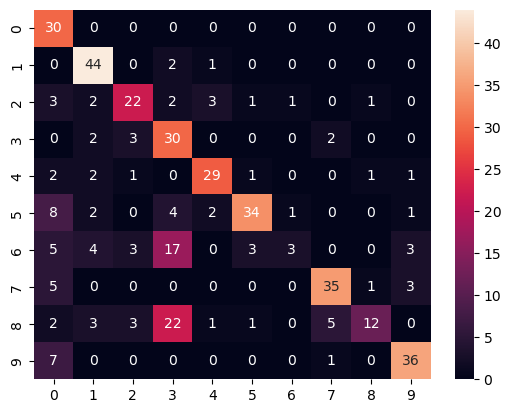

In [16]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        30
           1       0.75      0.94      0.83        47
           2       0.69      0.63      0.66        35
           3       0.39      0.81      0.53        37
           4       0.81      0.78      0.79        37
           5       0.85      0.65      0.74        52
           6       0.60      0.08      0.14        38
           7       0.81      0.80      0.80        44
           8       0.80      0.24      0.38        49
           9       0.82      0.82      0.82        44

    accuracy                           0.67       413
   macro avg       0.70      0.68      0.63       413
weighted avg       0.72      0.67      0.64       413



### CNN

In [18]:
# converting back to 64 * 64 pixels
X_train = X_train.reshape(len(X_train), 64 , 64)
X_test = X_test.reshape(len(X_test), 64 , 64)

In [19]:
model = keras.Sequential([
    layers.Conv2D(32, (4, 4), activation="relu", input_shape=(64, 64, 1), ),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation="relu", ),
    layers.MaxPool2D((2, 2)),
    # layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation = "softmax")
])
model.compile(
optimizer = "rmsprop",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

### Training the Model

In [20]:
model.fit(X_train, y_train, epochs= 20, batch_size=64)

Epoch 1/20
26/26 [==============================] - 5s 166ms/step - loss: 2.3113 - accuracy: 0.1431
Epoch 2/20
26/26 [==============================] - 4s 169ms/step - loss: 1.7747 - accuracy: 0.4300
Epoch 3/20
26/26 [==============================] - 4s 153ms/step - loss: 1.1362 - accuracy: 0.6446
Epoch 4/20
26/26 [==============================] - 5s 179ms/step - loss: 0.8705 - accuracy: 0.7198
Epoch 5/20
26/26 [==============================] - 6s 245ms/step - loss: 0.7187 - accuracy: 0.7671
Epoch 6/20
26/26 [==============================] - 6s 244ms/step - loss: 0.6430 - accuracy: 0.7896
Epoch 7/20
26/26 [==============================] - 6s 237ms/step - loss: 0.5386 - accuracy: 0.8302
Epoch 8/20
26/26 [==============================] - 6s 233ms/step - loss: 0.4823 - accuracy: 0.8399
Epoch 9/20
26/26 [==============================] - 6s 233ms/step - loss: 0.3723 - accuracy: 0.8757
Epoch 10/20
26/26 [==============================] - 6s 212ms/step - loss: 0.3279 - accuracy: 0.8951

### Model Evaluation

In [21]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 1s 30ms/step - loss: 0.3842 - accuracy: 0.8741


[0.3842126429080963, 0.8740919828414917]

In [22]:
predictions = model.predict(X_test)
predictions = [value.argmax() for value in predictions]

13/13 [==============================] - 0s 28ms/step


<AxesSubplot:>

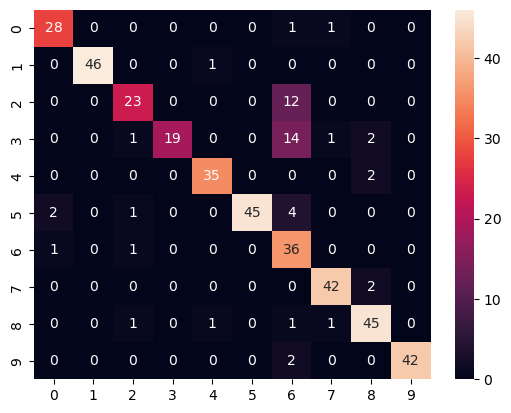

In [23]:
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       1.00      0.98      0.99        47
           2       0.85      0.66      0.74        35
           3       1.00      0.51      0.68        37
           4       0.95      0.95      0.95        37
           5       1.00      0.87      0.93        52
           6       0.51      0.95      0.67        38
           7       0.93      0.95      0.94        44
           8       0.88      0.92      0.90        49
           9       1.00      0.95      0.98        44

    accuracy                           0.87       413
   macro avg       0.90      0.87      0.87       413
weighted avg       0.91      0.87      0.88       413

